In [9]:
import pybullet as p
import numpy as np
from matplotlib import pyplot as plt

In [10]:
sim_id = p.connect(p.DIRECT)

In [11]:
import pybullet_data
p.setAdditionalSearchPath(pybullet_data.getDataPath())

In [12]:
p.resetSimulation()

plane_id=p.loadURDF('plane.urdf',
            physicsClientId=sim_id)
robot_id=p.loadURDF("kuka_iiwa/model.urdf",
            basePosition=[0,0,0],
            baseOrientation=p.getQuaternionFromEuler([0,0,0]),
            useFixedBase=True,
            physicsClientId=sim_id,
            globalScaling=1,
            flags=p.URDF_USE_IMPLICIT_CYLINDER)
cube_id=p.loadURDF('cube.urdf',
            basePosition=[0.5, 0, 0.5],
            physicsClientId=sim_id,
            globalScaling=0.2)
sphere_id=p.loadURDF('sphere2.urdf',
            basePosition=[0, 0.5, 0.5],
            physicsClientId=sim_id,
            globalScaling=0.2)

p.getNumBodies()

4

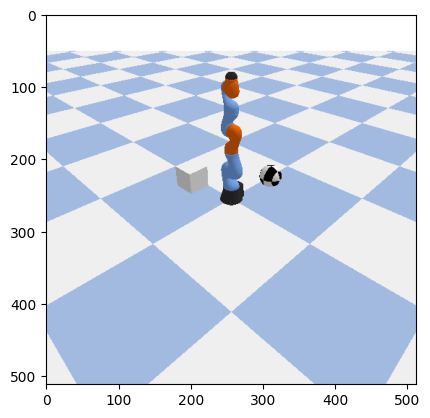

In [13]:
def showImage(cameraPos=[2, 2, 2]):
  viewMatrix = p.computeViewMatrix(
              cameraEyePosition=cameraPos,
              cameraTargetPosition=[0, 0, 0],
              cameraUpVector=[0, 0, 1])
  projectionMatrix = p.computeProjectionMatrixFOV(
              fov=60.0,
              aspect=1.0,
              nearVal=0.1,
              farVal=10)
  width, height, rgbImg, depthImg, segImg = p.getCameraImage(
              width=512,
              height=512,
              viewMatrix=viewMatrix,
              projectionMatrix=projectionMatrix)
  plt.imshow(rgbImg)

showImage()

In [14]:
def is_collision():
  p.performCollisionDetection(sim_id)
  pts1 = p.getContactPoints(robot_id,cube_id)
  pts2 = p.getContactPoints(robot_id,sphere_id)
  if pts1 or pts2:
    return True
  return False

def move_end_effector(target_pos):
  poses = p.calculateInverseKinematics(robot_id,6,target_pos)
  for i in range(len(poses)):
    p.resetJointState(robot_id, i, poses[i])
  pass

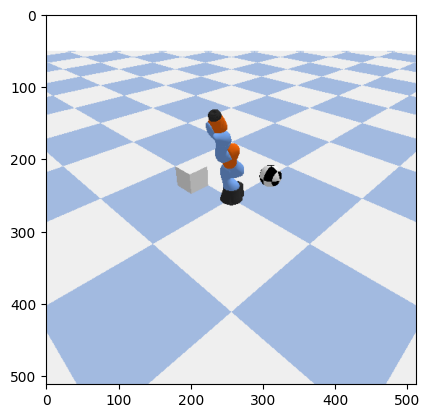

In [15]:
move_end_effector([2,2,2])
showImage()

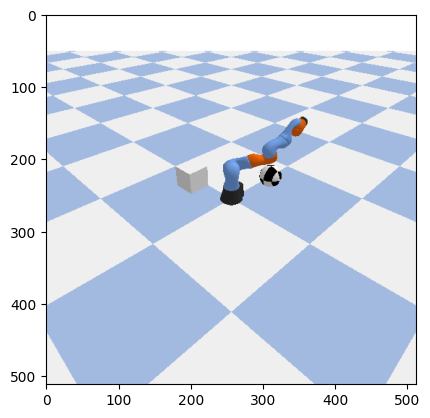

In [17]:
move_end_effector([-5,10,2])
showImage()